<br>
<br>
<br>
# 연관규칙분석 - Lift를 기준으로...
<br>

---

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',50)
pd.set_option('max_rows',100)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
AR_Location = pd.read_csv('AR_target_location.csv')
AR_App = pd.read_csv('AR_target_app.csv')
AR_PS = pd.read_csv('AR_target_PS.csv')

<br>
<br>
<br>

## Data

위치데이터, 설문정보, 앱데이터를 모두 활용한 연관규칙 분석

<br>

In [4]:
AR_Location = (
AR_Location.rename(columns = {'CU':'Location_CU'})
    .rename(columns = {'GS25':'Location_GS25'})
    .rename(columns = {'다이소':'Location_다이소'})
    .rename(columns = {'뚜레쥬르':'Location_뚜레쥬르'})
    .rename(columns = {'롯데리아':'Location_롯데리아'})
    .rename(columns = {'매표소/로비/휴게소':'Location_매표소/로비/휴게소'})
    .rename(columns = {'맥도날드':'Location_맥도날드'})
    .rename(columns = {'배스킨라빈스':'Location_배스킨라빈스'})
    .rename(columns = {'세븐일레븐':'Location_세븐일레븐'})
    .rename(columns = {'스타벅스':'Location_스타벅스'})
    .rename(columns = {'올리브영':'Location_올리브영'})
    .rename(columns = {'이디야':'Location_이디야'})
    .rename(columns = {'투썸플레이스':'Location_투썸플레이스'})
    .rename(columns = {'파리바게뜨':'Location_파리바게뜨'})
)

In [4]:
AR_Location.head()

,pid,Location_CU,Location_GS25,Location_다이소,Location_뚜레쥬르,Location_롯데리아,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_세븐일레븐,Location_스타벅스,Location_올리브영,Location_이디야,Location_투썸플레이스,Location_파리바게뜨,Coffee Shop,Korean Food Restaurants,Subway Station,Convenience Store,Discount Department Store,Burger/Sandwich,Bakery,Clothing Store,Japanese Food Restaurants,Supermarket,...,Shoe Store,Electronics Shop,General Hospital,Pizza,Karaoke,Main_city_서울,Main_city_경기,Main_city_경상,Main_city_충청,Main_city_부산,Main_city_인천,Main_city_전라,City_count_1,City_count_2,City_count_3,City_count_more4,ratio_0.25,ratio_0.5,ratio_0.75,ratio_1,ratio_2,ratio_3,ratio_3to5,ratio_5to11,ratio_more11
0,A0002542,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A0003204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A0003768,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A0008228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
AR_App.head()

,panel_id,App_num_total_40,App_num_total_50,App_num_total_60,App_num_total_70,App_num_total_80,App_num_total_90,App_num_total_100,App_num_total_110,App_num_total_less30,App_num_total_more120,App_num_mean_20.0,App_num_mean_30.0,App_num_mean_40.0,App_num_mean_50.0,App_num_mean_60.0,App_num_mean_less10,App_num_mean_more70,App_num_gap_20.0,App_num_gap_30.0,App_num_gap_40.0,App_num_gap_50.0,App_num_gap_60.0,App_num_gap_less10,App_num_gap_more70,...,틸리언,패널나우,패널락,패널파워,포토,핀크,핑크다이어리,하나1Q페이,하나멤버스,하나카드,하이마트,한컴오피스 viewer,해피머니,해피스크린,해피포인트,허니스크린,현대Hmall,현대카드,현대해상,홈&쇼핑,홈쇼핑모아,홈플러스,화해,후스콜,후후
0,A0002542,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,A0003204,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,A0003696,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,A0003768,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A0008228,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
del AR_PS['Unnamed: 0']
AR_PS.head()

,id,sex_female,sex_male,age_10_1,age_10_2,age_10_3,age_10_4,age_10_5,age_10_more6,wedding_etc,wedding_no,wedding_yes,family_num_1,family_num_2,family_num_3,family_num_4,family_num_more5,income_1,income_2,income_3,income_4,income_5,income_6,home_own_etc,home_own_월세,...,mobile_model_삼성 보급,mobile_model_삼성 최신,mobile_model_애플 보급,mobile_model_애플 최신,job_경영직,job_공무원(공기업포함),job_교사/학원강사,job_기타,job_농/임/어업,job_무직,job_사무직,job_생산/기술/노무직,job_서비스/영업/판매직,job_자영업,job_전문직,job_전업주부,job_프리랜서/자유직,job_학생,family_00s,family_10s,family_20s,family_30s,family_40s,family_50s,family_more60s
0,A0000910,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,A0001355,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,A0002394,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,A0002542,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,A0003204,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [7]:
AR_Location.shape

(9681, 74)

In [8]:
AR_App.shape

(9681, 319)

In [9]:
AR_PS.shape

(18463, 69)

In [6]:
AR_df = AR_Location.merge(AR_App, how='left', left_on='pid', right_on='panel_id')
AR_df = AR_df.merge(AR_PS, how='left', left_on='pid', right_on='id')

In [11]:
AR_df.head()

,pid,Location_CU,Location_GS25,Location_다이소,Location_뚜레쥬르,Location_롯데리아,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_세븐일레븐,Location_스타벅스,Location_올리브영,Location_이디야,Location_투썸플레이스,Location_파리바게뜨,Coffee Shop,Korean Food Restaurants,Subway Station,Convenience Store,Discount Department Store,Burger/Sandwich,Bakery,Clothing Store,Japanese Food Restaurants,Supermarket,...,mobile_model_삼성 보급,mobile_model_삼성 최신,mobile_model_애플 보급,mobile_model_애플 최신,job_경영직,job_공무원(공기업포함),job_교사/학원강사,job_기타,job_농/임/어업,job_무직,job_사무직,job_생산/기술/노무직,job_서비스/영업/판매직,job_자영업,job_전문직,job_전업주부,job_프리랜서/자유직,job_학생,family_00s,family_10s,family_20s,family_30s,family_40s,family_50s,family_more60s
0,A0002542,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,A0003204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,A0003768,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,A0008228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [12]:
AR_df.shape

(9681, 462)

In [7]:
del AR_df['pid']
del AR_df['panel_id']
del AR_df['id']

In [8]:
AR_df.shape

(9681, 459)

<br>
총 459개의 컬럼을 활용하여 연관규칙 분석 진행!
<br>

<br>
<br>
<br>

## Association Rule - Modeling

위치데이터, 설문정보, 앱데이터를 모두 활용한 연관규칙 분석

<br>

In [41]:
# min_support 0.01 이하는 발생하지 않은 사건으로 취급
# confidence는 일단 고려하지 않음
# lift의 min_threshold를 2로 설정 (두 사건이 독립일때 기대되는 동시발생빈도보다 2배 높은 동시발생빈도)

frequent_itemsets = apriori(AR_df, min_support=0.01, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)

In [9]:
# min_support 0.01 이하는 발생하지 않은 사건으로 취급
# confidence는 일단 고려하지 않음
# lift가 0인것까지 다 뽑음

frequent_itemsets = apriori(AR_df, min_support=0.01, use_colnames=True, max_len=2)
rules_2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0)

In [17]:
# 총 5488개의 규칙 발견, 조건절과 결과절이 서로 뒤바뀐 경우라면 같은 경우로 취급하기 때문에 이보다 규칙 수는 더 적음

len(rules)

5488

In [28]:
len(rules_2)

119490

In [29]:
rules_2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Location_GS25),(Location_CU),0.225287,0.148022,0.066935,0.297111,2.007213,0.033588,1.212110
1,(Location_CU),(Location_GS25),0.148022,0.225287,0.066935,0.452198,2.007213,0.033588,1.414222
2,(Location_다이소),(Location_CU),0.105464,0.148022,0.030782,0.291871,1.971808,0.015171,1.203139
3,(Location_CU),(Location_다이소),0.148022,0.105464,0.030782,0.207955,1.971808,0.015171,1.129401
4,(Location_뚜레쥬르),(Location_CU),0.051648,0.148022,0.015804,0.306000,2.067262,0.008159,1.227634


In [10]:
rules_2['antecedents'] = rules_2['antecedents'].map(lambda x: str(x).replace('frozenset({','').replace('})','')[1:-1])
rules_2['consequents'] = rules_2['consequents'].map(lambda x: str(x).replace('frozenset({','').replace('})','')[1:-1])

In [31]:
rules_2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Location_GS25,Location_CU,0.225287,0.148022,0.066935,0.297111,2.007213,0.033588,1.212110
1,Location_CU,Location_GS25,0.148022,0.225287,0.066935,0.452198,2.007213,0.033588,1.414222
2,Location_다이소,Location_CU,0.105464,0.148022,0.030782,0.291871,1.971808,0.015171,1.203139
3,Location_CU,Location_다이소,0.148022,0.105464,0.030782,0.207955,1.971808,0.015171,1.129401
4,Location_뚜레쥬르,Location_CU,0.051648,0.148022,0.015804,0.306000,2.067262,0.008159,1.227634


In [13]:
allcol_label = pd.read_csv("allcol_label.csv")

In [14]:
allcol_label.head()

,id,category
0,Location_CU,Real_location
1,Location_GS25,Real_location
2,Location_다이소,Real_location
3,Location_뚜레쥬르,Real_location
4,Location_롯데리아,Real_location


In [104]:
allcol_label[lambda x: x['category'] == '식음료']

,id,category
335,배달요기요,식음료
336,배달의민족,식음료
337,배달통,식음료


In [15]:
rules_2 = rules_2.merge(allcol_label, how='left', left_on='antecedents', right_on='id')
del rules_2['id']
rules_2 = rules_2.rename(columns={'category':'ante_category'})

In [16]:
rules_2 = rules_2.merge(allcol_label, how='left', left_on='consequents', right_on='id')
del rules_2['id']
rules_2 = rules_2.rename(columns={'category':'cons_category'})

In [17]:
rules_2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_category,cons_category
0,Location_CU,Location_GS25,0.148022,0.225287,0.066935,0.452198,2.007213,0.033588,1.414222,Real_location,Real_location
1,Location_GS25,Location_CU,0.225287,0.148022,0.066935,0.297111,2.007213,0.033588,1.212110,Real_location,Real_location
2,Location_다이소,Location_CU,0.105464,0.148022,0.030782,0.291871,1.971808,0.015171,1.203139,Real_location,Real_location
3,Location_CU,Location_다이소,0.148022,0.105464,0.030782,0.207955,1.971808,0.015171,1.129401,Real_location,Real_location
4,Location_뚜레쥬르,Location_CU,0.051648,0.148022,0.015804,0.306000,2.067262,0.008159,1.227634,Real_location,Real_location


<br><br><br><br><br><br>
<br><br><br><br><br><br>

In [19]:
sb_lift_plot_df = rules_2[lambda x: x['antecedents'] == '스타벅스'].sort_values(
    by='lift', ascending=False)[['consequents','lift','cons_category']]

In [20]:
sb_lift_plot_df.head()

,consequents,lift,cons_category
5218,Location_스타벅스,2.500925,Real_location
103519,이디야멤버스,2.473248,라이프스타일
78966,SSGPAY,2.458417,금융
43091,App_num_mean_more70,2.383886,App_number
89432,기프티콘,2.309399,엔터테인먼트


In [44]:
sb_lift_plot_df['cons_category'].unique()

array(['Real_location', '라이프스타일', '금융', 'App_number', '엔터테인먼트',
       '여행 및 지역정보', '쇼핑', '도서/참고자료', '뷰티', '건강/운동', '음악/오디오', '지도/내비게이션',
       'Location_category', '어드벤처', '생산성', '소셜', 'Location_stat', '날씨',
       '커뮤니케이션', 'PS_indiv', '도구', '비즈니스', '사진', '식음료', 'Usage_time',
       'PS_job', '동영상 플레이어/편집기', '교육', 'PS_Mobile', 'N',
       'Favorite_category', '만화', '퀴즈', '뉴스/잡지'], dtype=object)

In [21]:
app_cat = ['라이프스타일', '금융', '엔터테인먼트',
 '여행 및 지역정보', '쇼핑', '도서/참고자료', '뷰티', '건강/운동', '음악/오디오', '지도/내비게이션',
 '어드벤처', '생산성', '소셜', '날씨', '커뮤니케이션', '도구', '비즈니스', '사진', '식음료', 
 '동영상 플레이어/편집기', '교육', 'N', '만화', '퀴즈', '뉴스/잡지']

In [22]:
sb_lift_plot_df_apponly = sb_lift_plot_df[lambda x: x['cons_category'].isin(app_cat)]

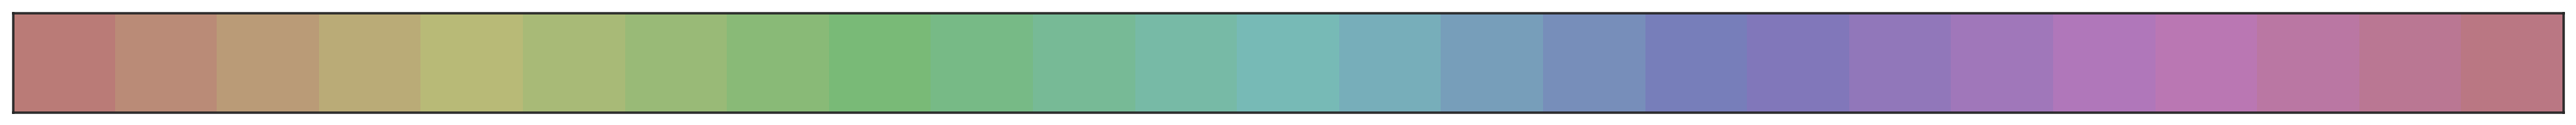

In [71]:
sns.palplot(sns.color_palette("hls", 25, desat=0.5))

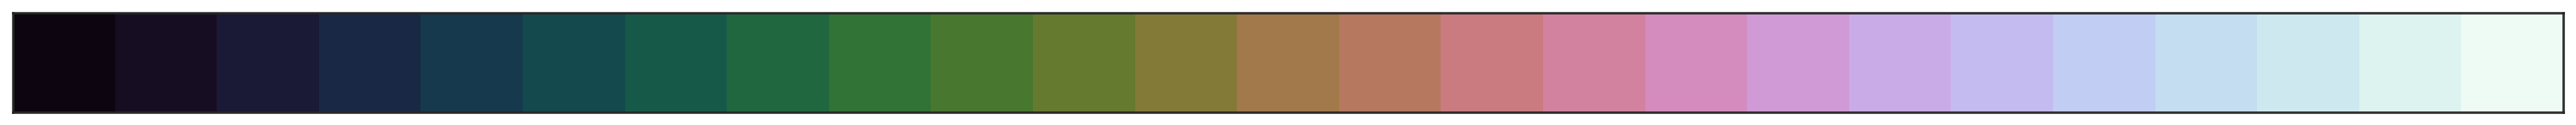

In [55]:
sns.palplot(sns.color_palette("cubehelix", 25))

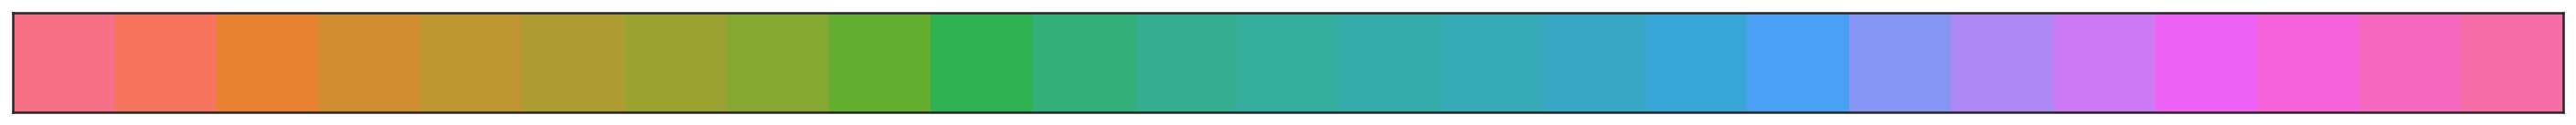

In [57]:
sns.palplot(sns.color_palette("husl", 25))

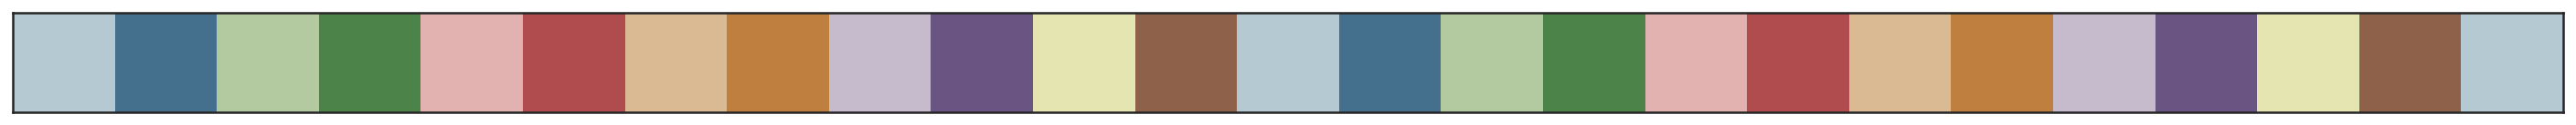

In [73]:
sns.palplot(sns.color_palette("Paired", 25, desat=0.5))

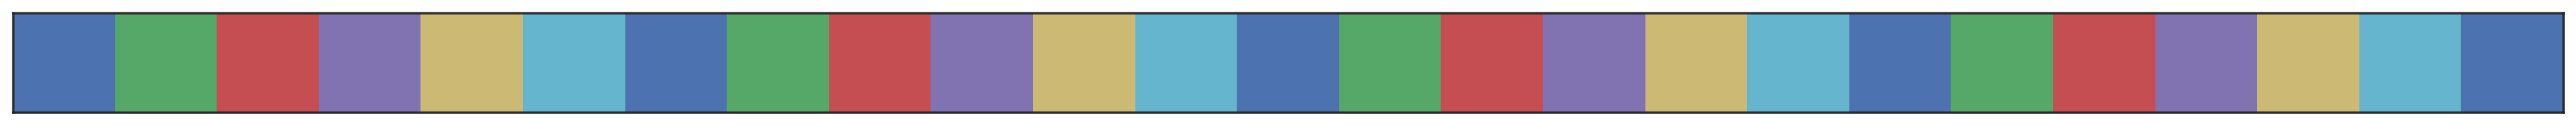

In [80]:
sns.palplot(sns.color_palette("deep", 25))

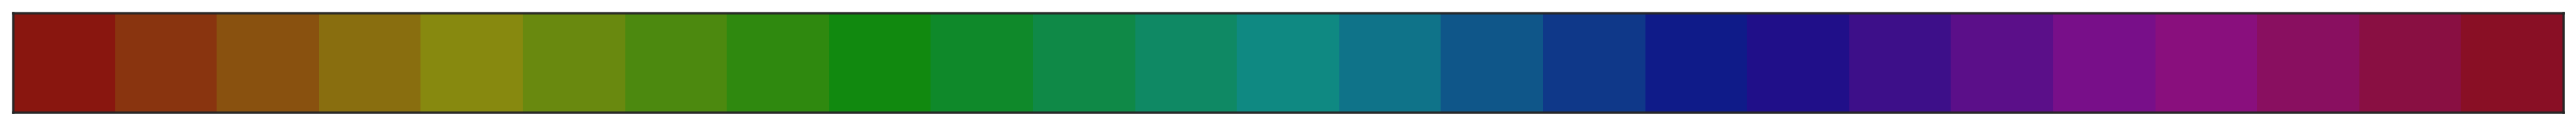

In [62]:
sns.palplot(sns.hls_palette(25, l=.3, s=.8))

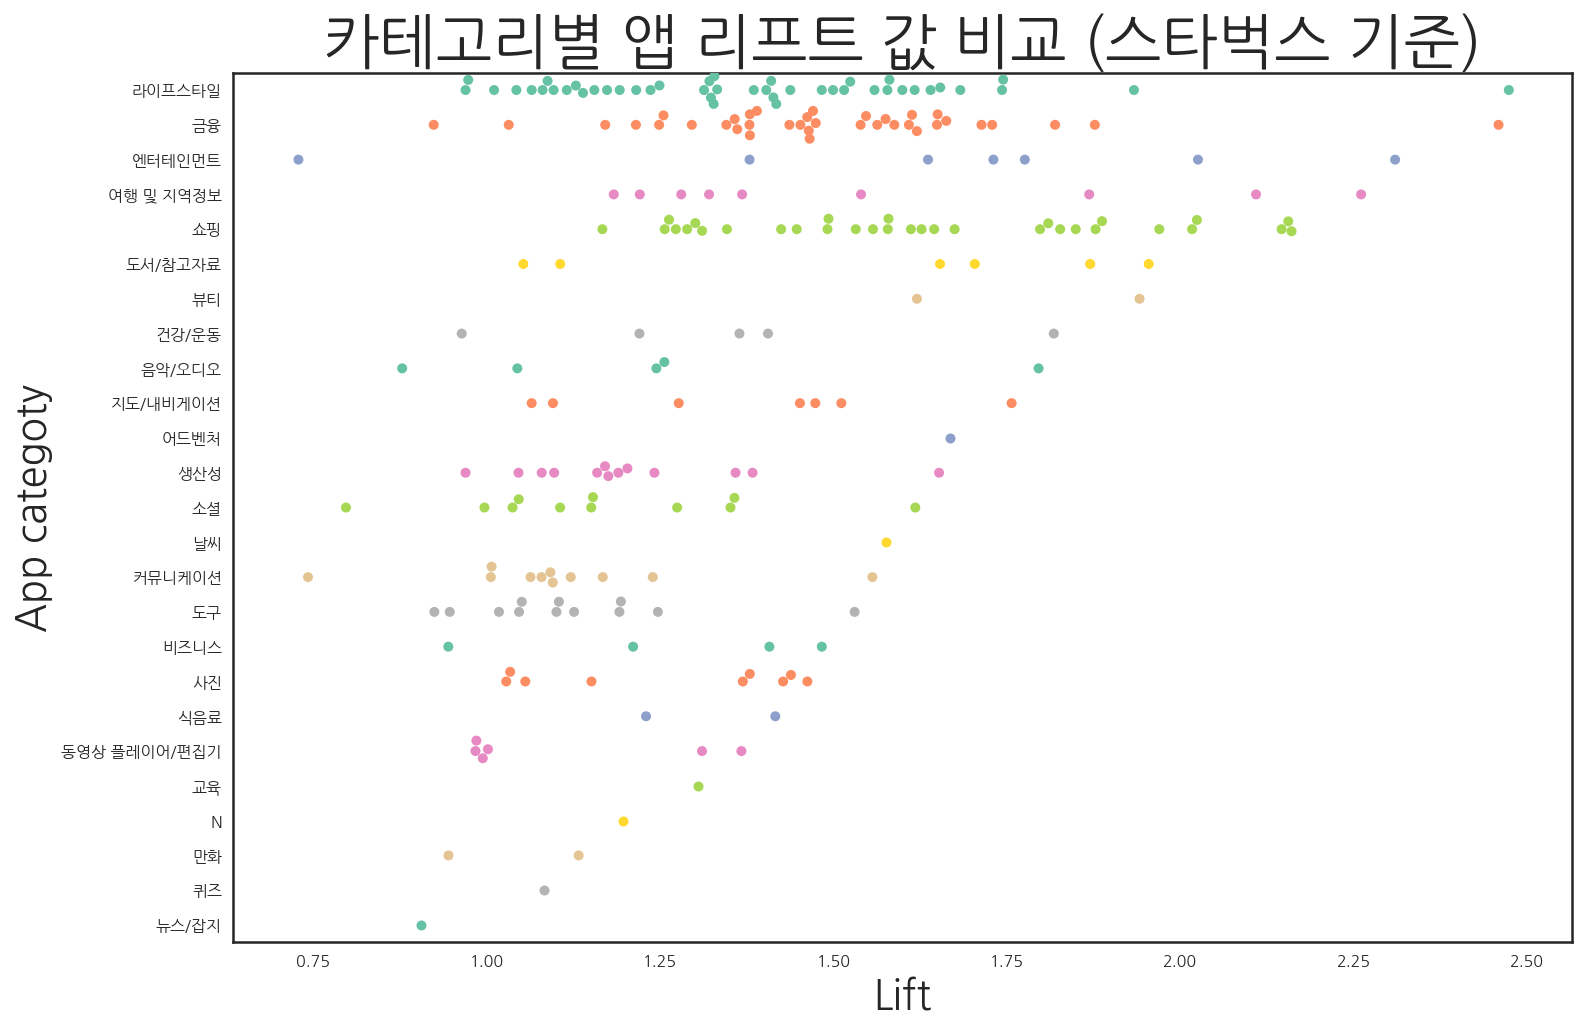

In [23]:
plt.figure(figsize=(12,8))

sns.swarmplot(x="lift", y="cons_category", palette="Set2", data=sb_lift_plot_df_apponly)

plt.xlabel('Lift', fontsize=20)
plt.ylabel('App categoty', fontsize=20)
plt.title('카테고리별 앱 리프트 값 비교 (스타벅스 기준)', fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [84]:
sb_lift_for_network = rules_2[lambda x: x['antecedents'] == '스타벅스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

edy_lift_for_network = rules_2[lambda x: x['antecedents'] == '이디야멤버스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

sb_lift_for_network = sb_lift_for_network[lambda x: x['lift'] >= 2]
edy_lift_for_network = edy_lift_for_network[lambda x: x['lift'] >= 2]

sb_edy_network = pd.concat([sb_lift_for_network,edy_lift_for_network])
sb_edy_network.columns = ['Source', 'Target', 'Weight']

sb_edy_network.to_csv('sb_edy_network.csv', index=False)

<br><br><br><br><br><br>
<br><br><br><br><br><br>

In [53]:
edy_lift_plot_df = rules_2[lambda x: x['antecedents'] == '이디야멤버스'].sort_values(
    by='lift', ascending=False)[['consequents','lift','cons_category']]

edy_lift_plot_df_apponly = edy_lift_plot_df[lambda x: x['cons_category'].isin(app_cat)]

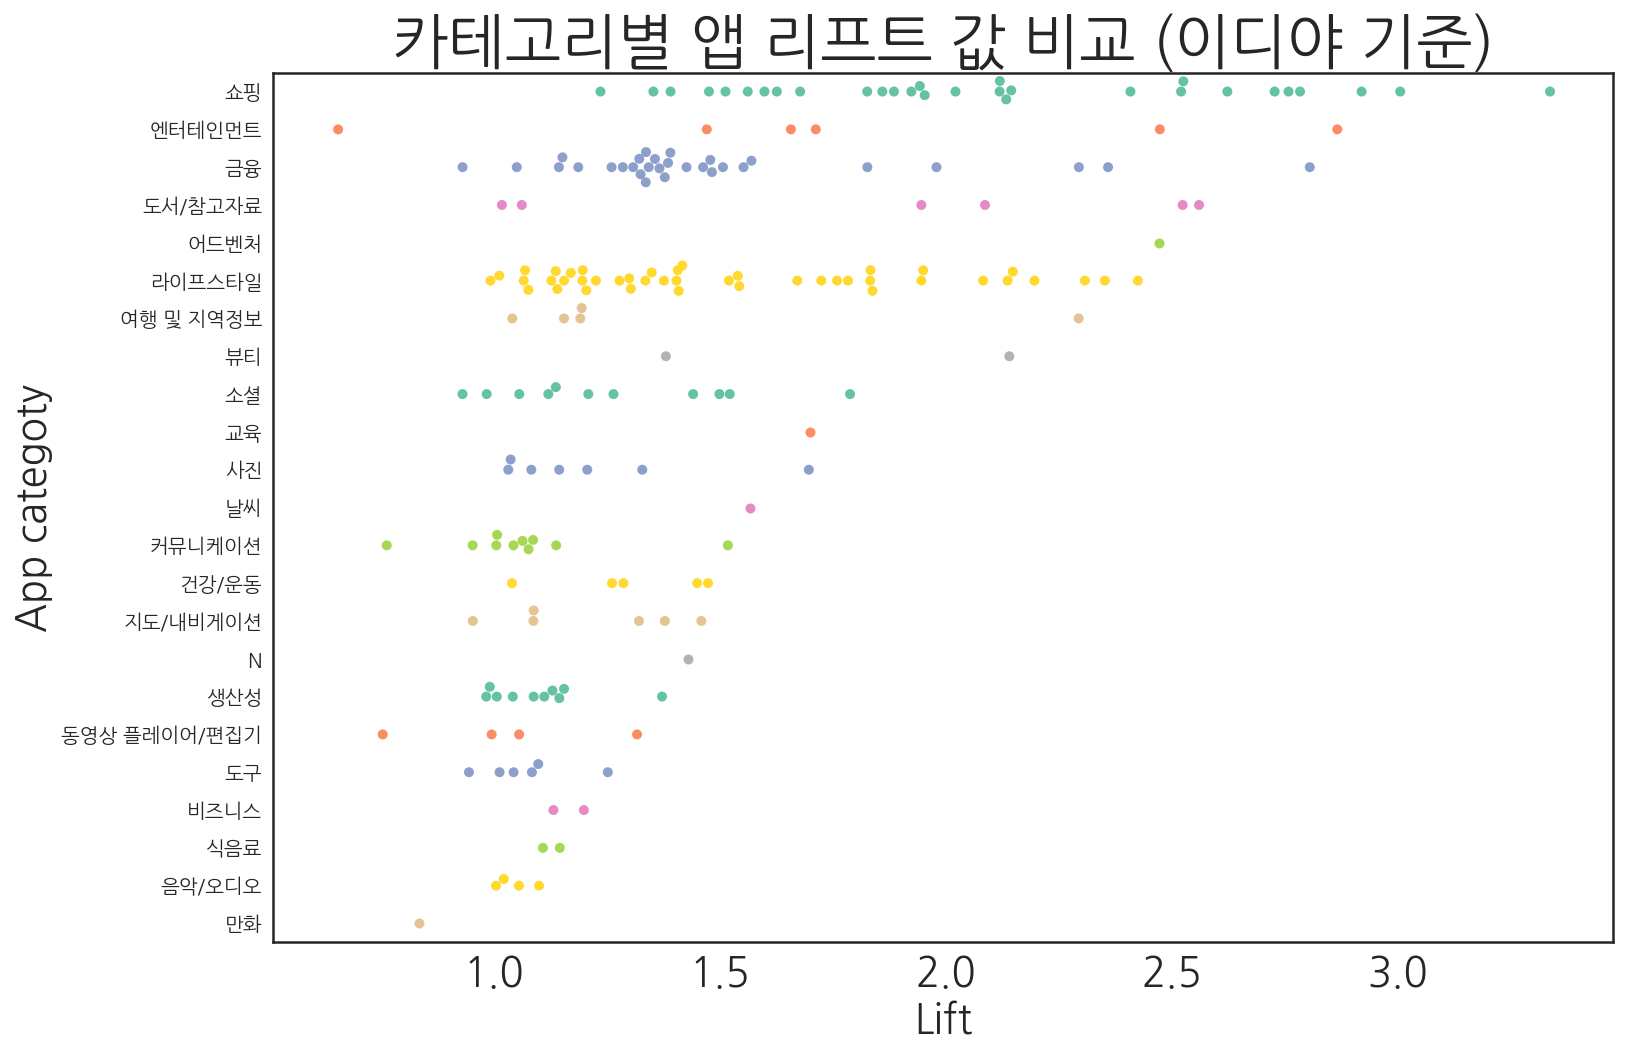

In [54]:
plt.figure(figsize=(12,8))

sns.swarmplot(x="lift", y="cons_category", palette='Set2', data=edy_lift_plot_df_apponly)

plt.xlabel('Lift', fontsize=20)
plt.ylabel('App categoty', fontsize=20)
plt.title('카테고리별 앱 리프트 값 비교 (이디야 기준)', fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

<br><br><br><br><br><br>
<br><br><br><br><br><br>

In [105]:
# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == '메가박스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_2 = rules_2[lambda x: x['antecedents'] == 'CGV'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_3 = rules_2[lambda x: x['antecedents'] == '롯데시네마'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]
lift_for_network_2 = lift_for_network_2[lambda x: x['lift'] >= 2]
lift_for_network_3 = lift_for_network_3[lambda x: x['lift'] >= 2]

lift_for_network_movie = pd.concat([lift_for_network_1,lift_for_network_2,lift_for_network_3])
lift_for_network_movie.columns = ['Source', 'Target', 'Weight']


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_movie[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_movie['dup?'] = rule_set
lift_for_network_movie['dup?'] = lift_for_network_movie['dup?'].map(lambda x: str(x))
lift_for_network_movie = lift_for_network_movie.drop_duplicates(subset=['dup?'])

del lift_for_network_movie['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_movie['Source'], lift_for_network_movie['Target']]).drop_duplicates()
movie_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_movie['Source'], lift_for_network_movie['Target'], lift_for_network_movie['Weight']) :
    movie_adj_matrix.loc[i,j] = k
    movie_adj_matrix.loc[j,i] = k   
    
movie_adj_matrix = movie_adj_matrix.fillna(int(0))
movie_adj_matrix.to_csv("movie_adj_matrix.csv")

In [121]:
movie_adj_matrix

,메가박스,CGV,롯데시네마,Location_매표소/로비/휴게소,App_num_total_more120,스타벅스,Movie Theater,L.pay,App_num_mean_more70,여기어때,야놀자
메가박스,0.000000,2.670430,2.816474,2.073851,2.029456,2.025314,2.024183,0.000000,0.000000,0.000000,0.000000
CGV,2.670430,0.000000,2.430964,0.000000,0.000000,0.000000,2.010931,0.000000,0.000000,0.000000,0.000000
롯데시네마,2.816474,2.430964,0.000000,2.089253,2.075214,0.000000,2.116249,2.442352,2.151537,2.066019,2.012647
Location_매표소/로비/휴게소,2.073851,0.000000,2.089253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
App_num_total_more120,2.029456,0.000000,2.075214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
스타벅스,2.025314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Movie Theater,2.024183,2.010931,2.116249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L.pay,0.000000,0.000000,2.442352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
App_num_mean_more70,0.000000,0.000000,2.151537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
여기어때,0.000000,0.000000,2.066019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
# 스타벅스 이디야

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == '스타벅스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_2 = rules_2[lambda x: x['antecedents'] == '이디야멤버스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]
lift_for_network_2 = lift_for_network_2[lambda x: x['lift'] >= 2]

lift_for_network_coffee = pd.concat([lift_for_network_1,lift_for_network_2])
lift_for_network_coffee.columns = ['Source', 'Target', 'Weight']


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_coffee[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_coffee['dup?'] = rule_set
lift_for_network_coffee['dup?'] = lift_for_network_coffee['dup?'].map(lambda x: str(x))
lift_for_network_coffee = lift_for_network_coffee.drop_duplicates(subset=['dup?'])

del lift_for_network_coffee['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_coffee['Source'], lift_for_network_coffee['Target']]).drop_duplicates()
coffee_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_coffee['Source'], lift_for_network_coffee['Target'], lift_for_network_coffee['Weight']) :
    coffee_adj_matrix.loc[i,j] = k
    coffee_adj_matrix.loc[j,i] = k   
    
coffee_adj_matrix = coffee_adj_matrix.fillna(int(0))
coffee_adj_matrix.to_csv("coffee_adj_matrix.csv")

In [35]:
freq = []

freq.appned(round(rules_2[lambda x: x['antecedents'] == '스타벅스']['antecedent support'].unique()[0],3) * 100)
freq.appned(round(rules_2[lambda x: x['antecedents'] == '이디야멤버스']['antecedent support'].unique()[0],3) * 100)

node_freq = pd.DataFrame(node_list.reset_index(drop=True)).rename(columns={0:'id'})

for i in  range(len(node_freq) - len(freq)) :
    freq.append(1)
    
node_freq['freq'] = freq
node_freq.to_csv('coffee_node_freq.csv', index=False)

0.165

In [55]:
# 영화 vs. 숙박

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == '메가박스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_2 = rules_2[lambda x: x['antecedents'] == 'CGV'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_3 = rules_2[lambda x: x['antecedents'] == '롯데시네마'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_4 = rules_2[lambda x: x['antecedents'] == '야놀자'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_5 = rules_2[lambda x: x['antecedents'] == '여기어때'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 1.7]
lift_for_network_2 = lift_for_network_2[lambda x: x['lift'] >= 1.7]
lift_for_network_3 = lift_for_network_3[lambda x: x['lift'] >= 1.7]
lift_for_network_4 = lift_for_network_4[lambda x: x['lift'] >= 1.7]
lift_for_network_5 = lift_for_network_5[lambda x: x['lift'] >= 1.7]

lift_for_network_weekend = pd.concat([lift_for_network_1,lift_for_network_2,lift_for_network_3,lift_for_network_4,lift_for_network_5])
lift_for_network_weekend.columns = ['Source', 'Target', 'Weight']
lift_for_network_weekend['Weight'] = lift_for_network_weekend['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_weekend[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_weekend['dup?'] = rule_set
lift_for_network_weekend['dup?'] = lift_for_network_weekend['dup?'].map(lambda x: str(x))
lift_for_network_weekend = lift_for_network_weekend.drop_duplicates(subset=['dup?'])

del lift_for_network_weekend['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_weekend['Source'], lift_for_network_weekend['Target']]).drop_duplicates()
weekend_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_weekend['Source'], lift_for_network_weekend['Target'], lift_for_network_weekend['Weight']) :
    weekend_adj_matrix.loc[i,j] = k
    weekend_adj_matrix.loc[j,i] = k   
    
weekend_adj_matrix = weekend_adj_matrix.fillna(int(0))
weekend_adj_matrix.to_csv("weekend_adj_matrix.csv")

In [58]:
freq = []

freq.append(round(rules_2[lambda x: x['antecedents'] == '메가박스']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == 'CGV']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '롯데시네마']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '야놀자']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '여기어때']['antecedent support'].unique()[0],3) * 100)

node_freq = pd.DataFrame(node_list.reset_index(drop=True)).rename(columns={0:'id'})

for i in  range(len(node_freq) - len(freq)) :
    freq.append(1)
    
node_freq['freq'] = freq
node_freq.to_csv('weekend_node_freq.csv', index=False)

In [60]:
# 대형마트

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == '이마트몰'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_2 = rules_2[lambda x: x['antecedents'] == '롯데마트몰'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_3 = rules_2[lambda x: x['antecedents'] == '홈플러스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]
lift_for_network_2 = lift_for_network_2[lambda x: x['lift'] >= 2]
lift_for_network_3 = lift_for_network_3[lambda x: x['lift'] >= 2]

lift_for_network_mart = pd.concat([lift_for_network_1,lift_for_network_2,lift_for_network_3])
lift_for_network_mart.columns = ['Source', 'Target', 'Weight']
lift_for_network_mart['Weight'] = lift_for_network_mart['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_mart[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_mart['dup?'] = rule_set
lift_for_network_mart['dup?'] = lift_for_network_mart['dup?'].map(lambda x: str(x))
lift_for_network_mart = lift_for_network_mart.drop_duplicates(subset=['dup?'])

del lift_for_network_mart['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_mart['Source'], lift_for_network_mart['Target']]).drop_duplicates()
mart_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_mart['Source'], lift_for_network_mart['Target'], lift_for_network_mart['Weight']) :
    mart_adj_matrix.loc[i,j] = k
    mart_adj_matrix.loc[j,i] = k   
    
mart_adj_matrix = mart_adj_matrix.fillna(int(0))
mart_adj_matrix.to_csv("mart_adj_matrix.csv")

In [61]:
freq = []

freq.append(round(rules_2[lambda x: x['antecedents'] == '이마트몰']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '롯데마트몰']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '홈플러스']['antecedent support'].unique()[0],3) * 100)

node_freq = pd.DataFrame(node_list.reset_index(drop=True)).rename(columns={0:'id'})

for i in  range(len(node_freq) - len(freq)) :
    freq.append(1)
    
node_freq['freq'] = freq
node_freq.to_csv('mart_node_freq.csv', index=False)

In [62]:
lift_for_network_1 = rules_2[lambda x: x['antecedents'] == '우리카드'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]
lift_for_network_2 = rules_2[lambda x: x['antecedents'] == '롯데카드'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]
lift_for_network_3 = rules_2[lambda x: x['antecedents'] == '삼성카드'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]
lift_for_network_4 = rules_2[lambda x: x['antecedents'] == '신한카드'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]
lift_for_network_5 = rules_2[lambda x: x['antecedents'] == 'KB국민카드'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]
lift_for_network_6 = rules_2[lambda x: x['antecedents'] == '하나카드'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]
lift_for_network_7 = rules_2[lambda x: x['antecedents'] == '현대카드'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]
lift_for_network_2 = lift_for_network_2[lambda x: x['lift'] >= 2]
lift_for_network_3 = lift_for_network_3[lambda x: x['lift'] >= 2]
lift_for_network_4 = lift_for_network_3[lambda x: x['lift'] >= 2]
lift_for_network_5 = lift_for_network_3[lambda x: x['lift'] >= 2]
lift_for_network_6 = lift_for_network_3[lambda x: x['lift'] >= 2]
lift_for_network_7 = lift_for_network_3[lambda x: x['lift'] >= 2]

lift_for_network_bank = pd.concat([lift_for_network_1,lift_for_network_2,lift_for_network_3,lift_for_network_4,
                                  lift_for_network_5,lift_for_network_6,lift_for_network_7])
lift_for_network_bank.columns = ['Source', 'Target', 'Weight']
lift_for_network_bank['Weight'] = lift_for_network_bank['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_bank[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_bank['dup?'] = rule_set
lift_for_network_bank['dup?'] = lift_for_network_bank['dup?'].map(lambda x: str(x))
lift_for_network_bank = lift_for_network_bank.drop_duplicates(subset=['dup?'])

del lift_for_network_bank['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_bank['Source'], lift_for_network_bank['Target']]).drop_duplicates()
bank_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_bank['Source'], lift_for_network_bank['Target'], lift_for_network_bank['Weight']) :
    bank_adj_matrix.loc[i,j] = k
    bank_adj_matrix.loc[j,i] = k   
    
bank_adj_matrix = bank_adj_matrix.fillna(int(0))
bank_adj_matrix.to_csv("bank_adj_matrix.csv")

In [63]:
node_list

107676                     우리카드
70391                      롯데카드
102427                     삼성카드
107676                    위비멤버스
107671                    원터치개인
107672                    원터치알림
107678                      위비톡
65457                   ISP/페이북
104197                     신한카드
70391                     L.pay
97416                     롯데마트몰
43062       App_num_mean_more70
96971                      롯데닷컴
98122                      하나카드
98007                     롯데홈쇼핑
40015     App_num_total_more120
66680                    KB국민카드
57771                     CJ온마트
61331                   GS SHOP
98133                      현대카드
102427                    삼성앱카드
85816           V-Guard for Web
dtype: object

In [64]:
appname = ['우리카드','롯데카드','삼성카드','신한카드','하나카드','KB국민카드','현대카드']
freq = []

freq.append(round(rules_2[lambda x: x['antecedents'] == '우리카드']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '롯데카드']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '삼성카드']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '신한카드']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '하나카드']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == 'KB국민카드']['antecedent support'].unique()[0],3) * 100)
freq.append(round(rules_2[lambda x: x['antecedents'] == '현대카드']['antecedent support'].unique()[0],3) * 100)

In [69]:
tmp1 = pd.DataFrame(node_list)

In [70]:
tmp2 = pd.DataFrame([appname,freq]).T

In [74]:
node_freq = tmp1.merge(tmp2, how='left', on=0).fillna(1).rename(columns={0:'id',1:'freq'})
node_freq.to_csv('card_node_freq.csv', index=False)    

In [24]:
# 소형 네트워크 - 전업주부

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == 'job_전업주부'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]

lift_for_network_housework = lift_for_network_1
lift_for_network_housework.columns = ['Source', 'Target', 'Weight']
lift_for_network_housework['Weight'] = lift_for_network_housework['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_housework[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_housework['dup?'] = rule_set
lift_for_network_housework['dup?'] = lift_for_network_housework['dup?'].map(lambda x: str(x))
lift_for_network_housework = lift_for_network_housework.drop_duplicates(subset=['dup?'])

del lift_for_network_housework['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_housework['Source'], lift_for_network_housework['Target']]).drop_duplicates()
housework_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_housework['Source'], lift_for_network_housework['Target'], lift_for_network_housework['Weight']) :
    housework_adj_matrix.loc[i,j] = k
    housework_adj_matrix.loc[j,i] = k   
    
housework_adj_matrix = housework_adj_matrix.fillna(int(0))
housework_adj_matrix.to_csv("housework_adj_matrix.csv")

In [25]:
# 소형 네트워크 - 학생

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == 'job_학생'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]

lift_for_network_student = lift_for_network_1
lift_for_network_student.columns = ['Source', 'Target', 'Weight']
lift_for_network_student['Weight'] = lift_for_network_student['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_student[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_student['dup?'] = rule_set
lift_for_network_student['dup?'] = lift_for_network_student['dup?'].map(lambda x: str(x))
lift_for_network_student = lift_for_network_student.drop_duplicates(subset=['dup?'])

del lift_for_network_student['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_student['Source'], lift_for_network_student['Target']]).drop_duplicates()
student_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_student['Source'], lift_for_network_student['Target'], lift_for_network_student['Weight']) :
    student_adj_matrix.loc[i,j] = k
    student_adj_matrix.loc[j,i] = k   
    
student_adj_matrix = student_adj_matrix.fillna(int(0))
student_adj_matrix.to_csv("student_adj_matrix.csv")

In [27]:
# 소형 네트워크 - 스벅

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == '스타벅스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]

lift_for_network_sb = lift_for_network_1
lift_for_network_sb.columns = ['Source', 'Target', 'Weight']
lift_for_network_sb['Weight'] = lift_for_network_sb['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_sb[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_sb['dup?'] = rule_set
lift_for_network_sb['dup?'] = lift_for_network_sb['dup?'].map(lambda x: str(x))
lift_for_network_sb = lift_for_network_sb.drop_duplicates(subset=['dup?'])

del lift_for_network_sb['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_sb['Source'], lift_for_network_sb['Target']]).drop_duplicates()
sb_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_sb['Source'], lift_for_network_sb['Target'], lift_for_network_sb['Weight']) :
    sb_adj_matrix.loc[i,j] = k
    sb_adj_matrix.loc[j,i] = k   
    
sb_adj_matrix = sb_adj_matrix.fillna(int(0))
sb_adj_matrix.to_csv("sb_adj_matrix.csv")

In [28]:
# 소형 네트워크 - 스벅_위치

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == 'Location_스타벅스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]

lift_for_network_sb_loc = lift_for_network_1
lift_for_network_sb_loc.columns = ['Source', 'Target', 'Weight']
lift_for_network_sb_loc['Weight'] = lift_for_network_sb_loc['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_sb_loc[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_sb_loc['dup?'] = rule_set
lift_for_network_sb_loc['dup?'] = lift_for_network_sb_loc['dup?'].map(lambda x: str(x))
lift_for_network_sb_loc = lift_for_network_sb_loc.drop_duplicates(subset=['dup?'])

del lift_for_network_sb_loc['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_sb_loc['Source'], lift_for_network_sb_loc['Target']]).drop_duplicates()
sbloc_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_sb_loc['Source'], lift_for_network_sb_loc['Target'], lift_for_network_sb_loc['Weight']) :
    sbloc_adj_matrix.loc[i,j] = k
    sbloc_adj_matrix.loc[j,i] = k   
    
sbloc_adj_matrix = sbloc_adj_matrix.fillna(int(0))
sbloc_adj_matrix.to_csv("sbloc_adj_matrix.csv")

In [29]:
# 소형 네트워크 - 이디야

# 1. 원하는 노드와 관련된 룰만 찾기

lift_for_network_1 = rules_2[lambda x: x['antecedents'] == '이디야멤버스'].sort_values(
    by='lift', ascending=False)[['antecedents','consequents','lift']]

lift_for_network_1 = lift_for_network_1[lambda x: x['lift'] >= 2]

lift_for_network_ediya = lift_for_network_1
lift_for_network_ediya.columns = ['Source', 'Target', 'Weight']
lift_for_network_ediya['Weight'] = lift_for_network_ediya['Weight'].map(lambda x: round(x,1))


# 2. 중복 룰 제거

dup_rule_df = lift_for_network_ediya[['Source', 'Target']].reset_index(drop=True)

rule_set = []

for i in range(len(dup_rule_df)):
    x = set(dup_rule_df.loc[i,:])
    rule_set.append(x)

lift_for_network_ediya['dup?'] = rule_set
lift_for_network_ediya['dup?'] = lift_for_network_ediya['dup?'].map(lambda x: str(x))
lift_for_network_ediya = lift_for_network_ediya.drop_duplicates(subset=['dup?'])

del lift_for_network_ediya['dup?']


# 3. undirected link를 위해 matrix로 변환

node_list = pd.concat([lift_for_network_ediya['Source'], lift_for_network_ediya['Target']]).drop_duplicates()
ediya_adj_matrix = pd.DataFrame(index=node_list, columns=node_list)

for i,j,k in zip(lift_for_network_ediya['Source'], lift_for_network_ediya['Target'], lift_for_network_ediya['Weight']) :
    ediya_adj_matrix.loc[i,j] = k
    ediya_adj_matrix.loc[j,i] = k   
    
ediya_adj_matrix = ediya_adj_matrix.fillna(int(0))
ediya_adj_matrix.to_csv("ediya_adj_matrix.csv")